# TUGAS PRAKTIK DEMONSTRASI

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# Muhammad Alwansyah Mardika

# **Bank ABC**

## Mengumpulkan data:

In [ ]:
data = pd.read_excel('creditapproval-data kotor1.xlsx')
data.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x5,P,34,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
3,x8,L,27,4435001.0,8,671098.00,100,301,6000.0,1,874,875,4435001.0,0.00,0.0,LANCAR
4,x10,P,49,1443750.0,15,107800.00,100,301,6000.0,1,874,875,1617000.0,1078000.00,0.0,MACET


## Menelaah data:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            731 non-null    object 
 1   jenis_kelamin           731 non-null    object 
 2   umur                    731 non-null    int64  
 3   jml_pinjaman            731 non-null    float64
 4   jkw                     731 non-null    int64  
 5   jml_angsuran_per_bulan  731 non-null    float64
 6   type_pinjaman           731 non-null    int64  
 7   jenis_pinjaman          731 non-null    int64  
 8   bi_sektor_ekonomi       730 non-null    float64
 9   col                     731 non-null    int64  
 10  bi_golongan_debitur     731 non-null    int64  
 11  bi_gol_penjamin         731 non-null    int64  
 12  saldo_nominatif         731 non-null    float64
 13  tunggakan_pokok         731 non-null    float64
 14  tunggakan_bunga         731 non-null    fl

## Memvalidasi data:

In [ ]:
data['jenis_kelamin'] = data['jenis_kelamin'].astype('category')
data['type_pinjaman'] = data['type_pinjaman'].astype('category')
data['jenis_pinjaman'] = data['jenis_pinjaman'].astype('category')
data['bi_sektor_ekonomi'] = data['bi_sektor_ekonomi'].astype('category')
data['col'] = data['col'].astype('category')
data['bi_golongan_debitur'] = data['bi_golongan_debitur'].astype('category')
data['bi_gol_penjamin'] = data['bi_gol_penjamin'].astype('category')

In [ ]:
data.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,731.000000,7.310000e+02,731.000000,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,38.712722,2.372601e+06,19.183311,2.227276e+05,1.690967e+06,6.434253e+05,7.210657e+04
std,8.775095,5.622943e+06,32.687089,4.848575e+05,4.252253e+06,2.392825e+06,4.651736e+05
min,3.000000,8.333333e+04,1.000000,0.000000e+00,-4.000000e+06,0.000000e+00,0.000000e+00
25%,33.000000,8.750000e+05,8.000000,6.850000e+04,5.341667e+05,1.000000e+05,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,9.625000e+05,3.435000e+05,0.000000e+00
75%,44.000000,2.000000e+06,20.000000,2.333832e+05,1.655000e+06,7.494167e+05,5.916666e+04
max,80.000000,1.000000e+08,679.000000,1.035000e+07,8.000000e+07,5.700000e+07,1.100000e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   nama_nasabah            731 non-null    object  
 1   jenis_kelamin           731 non-null    category
 2   umur                    731 non-null    int64   
 3   jml_pinjaman            731 non-null    float64 
 4   jkw                     731 non-null    int64   
 5   jml_angsuran_per_bulan  731 non-null    float64 
 6   type_pinjaman           731 non-null    category
 7   jenis_pinjaman          731 non-null    category
 8   bi_sektor_ekonomi       730 non-null    category
 9   col                     731 non-null    category
 10  bi_golongan_debitur     731 non-null    category
 11  bi_gol_penjamin         731 non-null    category
 12  saldo_nominatif         731 non-null    float64 
 13  tunggakan_pokok         731 non-null    float64 
 14  tunggakan_bunga         73

## Menentukan objek data:

In [ ]:
X = data[['jenis_kelamin','umur','jml_pinjaman','jkw','jml_angsuran_per_bulan','type_pinjaman','jenis_pinjaman','bi_sektor_ekonomi','col','bi_golongan_debitur','bi_gol_penjamin','saldo_nominatif','tunggakan_pokok','tunggakan_bunga']]
y = data['status kredit'].values

In [ ]:
y[0:4]

array(['MACET', 'MACET', 'MACET', 'LANCAR'], dtype=object)

In [ ]:
X

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
0,P,40,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0
1,L,31,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0
2,P,34,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0
3,L,27,4435001.0,8,671098.00,100,301,6000.0,1,874,875,4435001.0,0.00,0.0
4,P,49,1443750.0,15,107800.00,100,301,6000.0,1,874,875,1617000.0,1078000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,L,38,1000000.0,16,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0
727,P,36,1000000.0,12,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0
728,L,28,2000000.0,10,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0
729,P,31,1312500.0,7,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jenis_kelamin           731 non-null    object 
 1   umur                    731 non-null    int64  
 2   jml_pinjaman            731 non-null    float64
 3   jkw                     731 non-null    int64  
 4   jml_angsuran_per_bulan  731 non-null    float64
 5   type_pinjaman           731 non-null    int64  
 6   jenis_pinjaman          731 non-null    int64  
 7   bi_sektor_ekonomi       730 non-null    float64
 8   col                     731 non-null    int64  
 9   bi_golongan_debitur     731 non-null    int64  
 10  bi_gol_penjamin         731 non-null    int64  
 11  saldo_nominatif         731 non-null    float64
 12  tunggakan_pokok         731 non-null    float64
 13  tunggakan_bunga         731 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory 

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            731 non-null    object 
 1   jenis_kelamin           731 non-null    object 
 2   umur                    731 non-null    int64  
 3   jml_pinjaman            731 non-null    float64
 4   jkw                     731 non-null    int64  
 5   jml_angsuran_per_bulan  731 non-null    float64
 6   type_pinjaman           731 non-null    int64  
 7   jenis_pinjaman          731 non-null    int64  
 8   bi_sektor_ekonomi       730 non-null    float64
 9   col                     731 non-null    int64  
 10  bi_golongan_debitur     731 non-null    int64  
 11  bi_gol_penjamin         731 non-null    int64  
 12  saldo_nominatif         731 non-null    float64
 13  tunggakan_pokok         731 non-null    float64
 14  tunggakan_bunga         731 non-null    fl

## Membersihkan data:

sebelum diupload di colab, sudah saya bersihkan datanya di Excel

## Mengkonstruksi data:

In [ ]:
clf1 = setup(data = data,
             target = 'status kredit',
             numeric_imputation = 'mean',
             numeric_features= ['umur','jml_pinjaman','jkw','jml_angsuran_per_bulan','saldo_nominatif','tunggakan_pokok','tunggakan_bunga'],
             categorical_features = ['jenis_kelamin','type_pinjaman','jenis_pinjaman','bi_sektor_ekonomi','col','bi_golongan_debitur','bi_gol_penjamin'],
             ignore_features = ['nama_nasabah'],
             silent = True
             )

,Description,Value
0,session_id,7040
1,Target,status kredit
2,Target Type,Binary
3,Label Encoded,"LANCAR: 0, MACET: 1"
4,Original Data,"(731, 16)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['jenis_kelamin',
                                                            'type_pinjaman',
                                                            'jenis_pinjaman',
                                                            'bi_sektor_ekonomi',
                                                            'col',
                                                            'bi_golongan_debitur',
                                                            'bi_gol_penjamin'],
                                      display_types=False,
                                      features_todrop=['nama_nasabah'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numeri

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9628,0.9856,0.9837,0.9658,0.9744,0.9063,0.9086,0.124
ada,Ada Boost Classifier,0.9569,0.9733,0.9781,0.9631,0.9703,0.8917,0.8935,0.144
rf,Random Forest Classifier,0.9530,0.9879,0.9836,0.9533,0.9679,0.8798,0.8834,0.218
gbc,Gradient Boosting Classifier,0.9511,0.9864,0.9781,0.9555,0.9663,0.8766,0.8800,0.182
et,Extra Trees Classifier,0.9373,0.9777,0.9782,0.9377,0.9573,0.8396,0.8439,0.178
lr,Logistic Regression,0.9217,0.9609,0.9564,0.9369,0.9461,0.8025,0.8055,0.318
dt,Decision Tree Classifier,0.9217,0.9119,0.9348,0.9560,0.9446,0.8113,0.8154,0.015
lda,Linear Discriminant Analysis,0.8767,0.9143,0.9180,0.9125,0.9139,0.6929,0.6989,0.015
knn,K Neighbors Classifier,0.8747,0.9332,0.9184,0.9093,0.9131,0.6878,0.6908,0.020
svm,SVM - Linear Kernel,0.8335,0.0000,0.9243,0.8806,0.8874,0.5263,0.5401,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7040, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7040, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Menentukan label data

In [ ]:
decision_tree_model  = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9063,0.9459,0.9459,0.9459,0.8126,0.8126
1,0.9216,0.9250,0.9167,0.9706,0.9429,0.8182,0.8216
2,0.9412,0.9000,1.0000,0.9231,0.9600,0.8496,0.8593
3,0.9608,0.9528,0.9722,0.9722,0.9722,0.9056,0.9056
4,0.9608,0.9286,1.0000,0.9487,0.9737,0.8970,0.9018
5,0.9412,0.9595,0.9189,1.0000,0.9577,0.8615,0.8699
6,0.8235,0.8118,0.8378,0.9118,0.8732,0.5846,0.5903
7,0.9020,0.9102,0.8919,0.9706,0.9296,0.7692,0.7767
8,0.9412,0.9373,0.9459,0.9722,0.9589,0.8555,0.8565


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7040, splitter='best')
INFO:logs:create_model() succesfully completed......................................


## Membangun model

In [ ]:
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7040, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7040, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


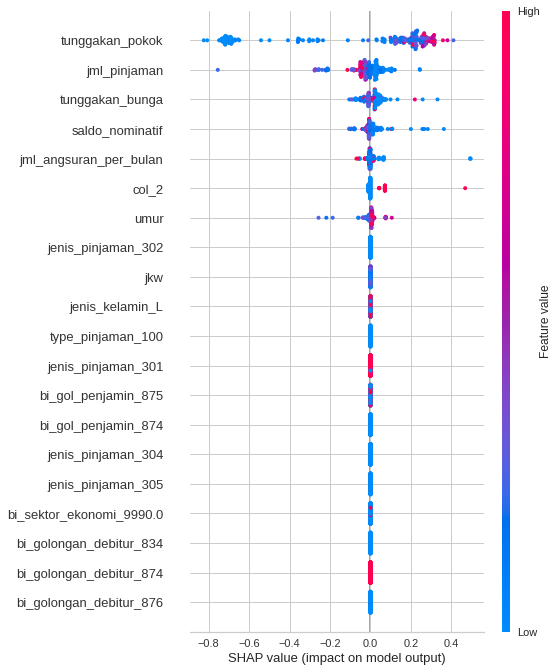

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(decision_tree_model)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y = data['status kredit'].values
y[0:5]

array(['MACET', 'MACET', 'MACET', 'LANCAR', 'MACET'], dtype=object)

In [ ]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (584, 15) (584, 1)
Test set: (147, 15) (147, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Importing the library
from sklearn.tree import DecisionTreeClassifier
#Modelling ("entropy" or "gini")
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisiontree # it shows the default parameters
#Fitting the data X and y
decisiontree.fit (X_train,y_train)

ValueError: ignored

In [ ]:
y_pred = decisiontree.predict(X_test)

NameError: ignored

In [ ]:
y_pred = reg.predict(X_test)

NameError: ignored

In [ ]:
# calculate manually
d = y_test - y_train
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

ValueError: ignored

In [ ]:
mse = mean_squared_error (y_train, y_test)
print('Mean squared error of testing set:', mse)

ValueError: ignored

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared Error :', mse)

NameError: ignored

In [ ]:
y_test, y_train

(    status kredit
 196        LANCAR
 187         MACET
 14          MACET
 31          MACET
 390         MACET
 ..            ...
 566         MACET
 688         MACET
 266         MACET
 504        LANCAR
 239         MACET
 
 [147 rows x 1 columns],     status kredit
 97         LANCAR
 503        LANCAR
 642         MACET
 498        LANCAR
 303         MACET
 ..            ...
 707         MACET
 192         MACET
 629         MACET
 559         MACET
 684         MACET
 
 [584 rows x 1 columns])

In [ ]:
mae = mean_absolute_error (y_test, y_train)
print("Mean absolute error :" , mae)

ValueError: ignored

In [ ]:
#Calculating MAE
mae = mean_absolute_error(y_test, y_train)
print('Mean absolute error of testing set:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)


ValueError: ignored